In [1]:
import json
import requests
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

In [2]:
# TCRNo8 JS URL 
url="https://www.followmychallenge.com/live/tcrno9/data/replaydata.js"

# Fetch the route data from the URL
response = requests.get(url)
input_text = response.text

# Find the index of the substring 'var replaydata ='
start_index = input_text.find('var replaydata =')
if start_index != -1:
    # Remove everything after 'var replaydata =' including itself
    cleaned_text = input_text[:start_index]
else:
    cleaned_text = input_text
    
# Remove spaces 
cleaned_text = cleaned_text.strip()

# Remove unwanted characters and split the cleaned text into separate JSON strings
json_strings = cleaned_text.replace('\n', '').split(';')
json_strings = [s.strip() for s in json_strings if s.strip()]

# Parse each JSON object and store them in a list
data = [json.loads(obj[obj.find('{'):]) for obj in json_strings]

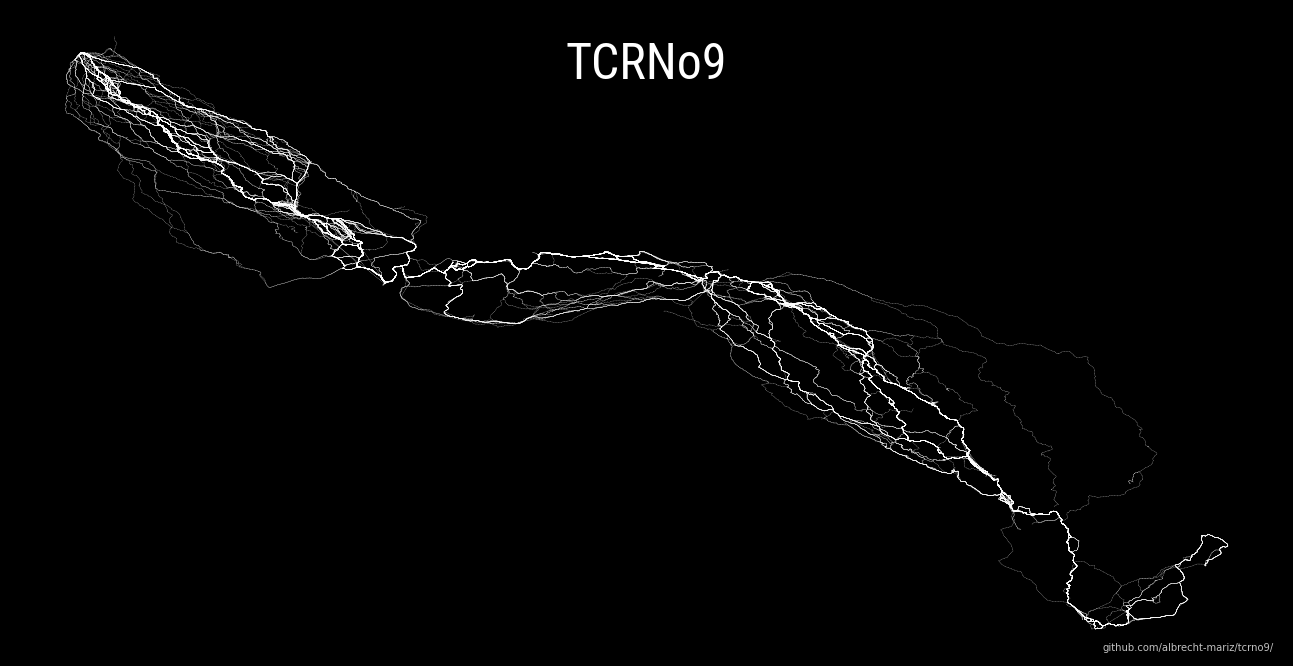

In [3]:
# Set the face color of the axes to black before creating the plot
plt.figure(figsize=(22.92, 12), facecolor='black')
ax = plt.axes(facecolor='black')

# Loop through each rider's data and plot the coordinates as lines on the map
for rider_data in data:
    # Extract the coordinates for the current rider
    coordinates = rider_data["geometry"]["coordinates"]
    lats, longs = zip(*coordinates)

    # Plot the coordinates as a line on the map with a white line
    plt.plot(lats, longs, color='white', linestyle='dashed', linewidth=0.3)

# Set the title
plt.title("TCRNo9",
          x=0.5,
          y=0.88,
          fontproperties = FontProperties(
              fname = '../assets/RobotoCondensed-Regular.ttf',
              size = 50),
          color='white')

# Hide the axes
plt.xticks(visible=False)
plt.yticks(visible=False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# GitHub link
github = 'github.com/albrecht-mariz/tcrno9/'
plt.text(0.99, 0.01, github, color='silver', ha='right', va='bottom', fontsize=10, transform=plt.gca().transAxes)


# Save the plot as a PNG file
plt.savefig("../maps/tcrno9_route_22_12.png", dpi=300, bbox_inches='tight')

# Display plot
plt.show()